In [2]:
#Installing XGBOOst using Jupyter notebook
!pip install xgboost

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# X&Y

In [5]:
input_data=df.drop(columns='class')
x=pd.get_dummies(input_data,drop_first=True)


In [6]:
y=pd.get_dummies(df['class'],drop_first=True)

# Train_test_split

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

# XGBoostClassifier model with default parameters

In [8]:
#modelling

from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(x_train,y_train)

#prediction
train_prediction=xgb_model.predict(x_train)
test_prediction=xgb_model.predict(x_test)

#Evaluation
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train,train_prediction)
test_accuracy=accuracy_score(y_test,test_prediction)
print(train_accuracy,test_accuracy)

#cross val score

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(xgb_model,x,y,cv=5).mean()
cvs

1.0 1.0


0.9330246305418719

# Hyper parameter tunning

In [10]:
# from sklearn.model_selection import GridSearchCV

#Modelling
estimator=XGBClassifier()

#param_grid

param_grid={'n_estimators':[10,20,40,200],
           'max_depth':[3,4,5],
           'gamma':[0,0.15,0.3,0.5,1]}

#Grid Search


grid=GridSearchCV(xgb_model,param_grid,cv=5,scoring='accuracy')

#fit this model

grid.fit(x_train,y_train)

#best parameters for XGB model

grid.best_params_

{'gamma': 0, 'max_depth': 3, 'n_estimators': 40}

# Feature Importances

In [11]:
grid.best_estimator_.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.04304279e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.12723676e-03,
       6.88704010e-03, 5.07789776e-02, 2.11671623e-03, 2.64812596e-02,
       7.45877624e-02, 4.66294307e-03, 2.74415225e-01, 1.60337146e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.01011954e-02,
       1.66535154e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.08740123e-04, 5.70359407e-04, 2.88186699e-01, 0.00000000e+00,
       1.53136879e-01, 1.66711968e-03, 1.13135575e-04, 0.00000000e+00,
       0.00000000e+00, 2.25782307e-04, 2.05040611e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [26]:
feats=pd.DataFrame(index=x.columns,
                  data=grid.best_estimator_.feature_importances_,
                  columns=['Importance'])
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
bruises_t,0.050779
odor_f,0.026481
odor_l,0.074588
odor_n,0.274415
odor_p,0.016034
gill-spacing_w,0.010101
gill-size_n,0.016654
stalk-root_c,0.288187
stalk-root_r,0.153137
stalk-surface-below-ring_y,0.020504


# XGBoost with best Hyperparameter

In [27]:
x_imp=x[important_features]  #dropped unimp

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

from xgboost import XGBClassifier
xgh_model=XGBClassifier()
xgh_model.fit(x_train,y_train)

#prediction
train_prediction=xgh_model.predict(x_train)
test_prediction=xgh_model.predict(x_test)

#Evaluation
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train,train_prediction)
test_accuracy=accuracy_score(y_test,test_prediction)
print(train_accuracy,test_accuracy)

#cross val score

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(xgh_model,x,y,cv=5).mean()
cvs

1.0 1.0


0.9330246305418719

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_prediction)

array([[851,   0],
       [  0, 774]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



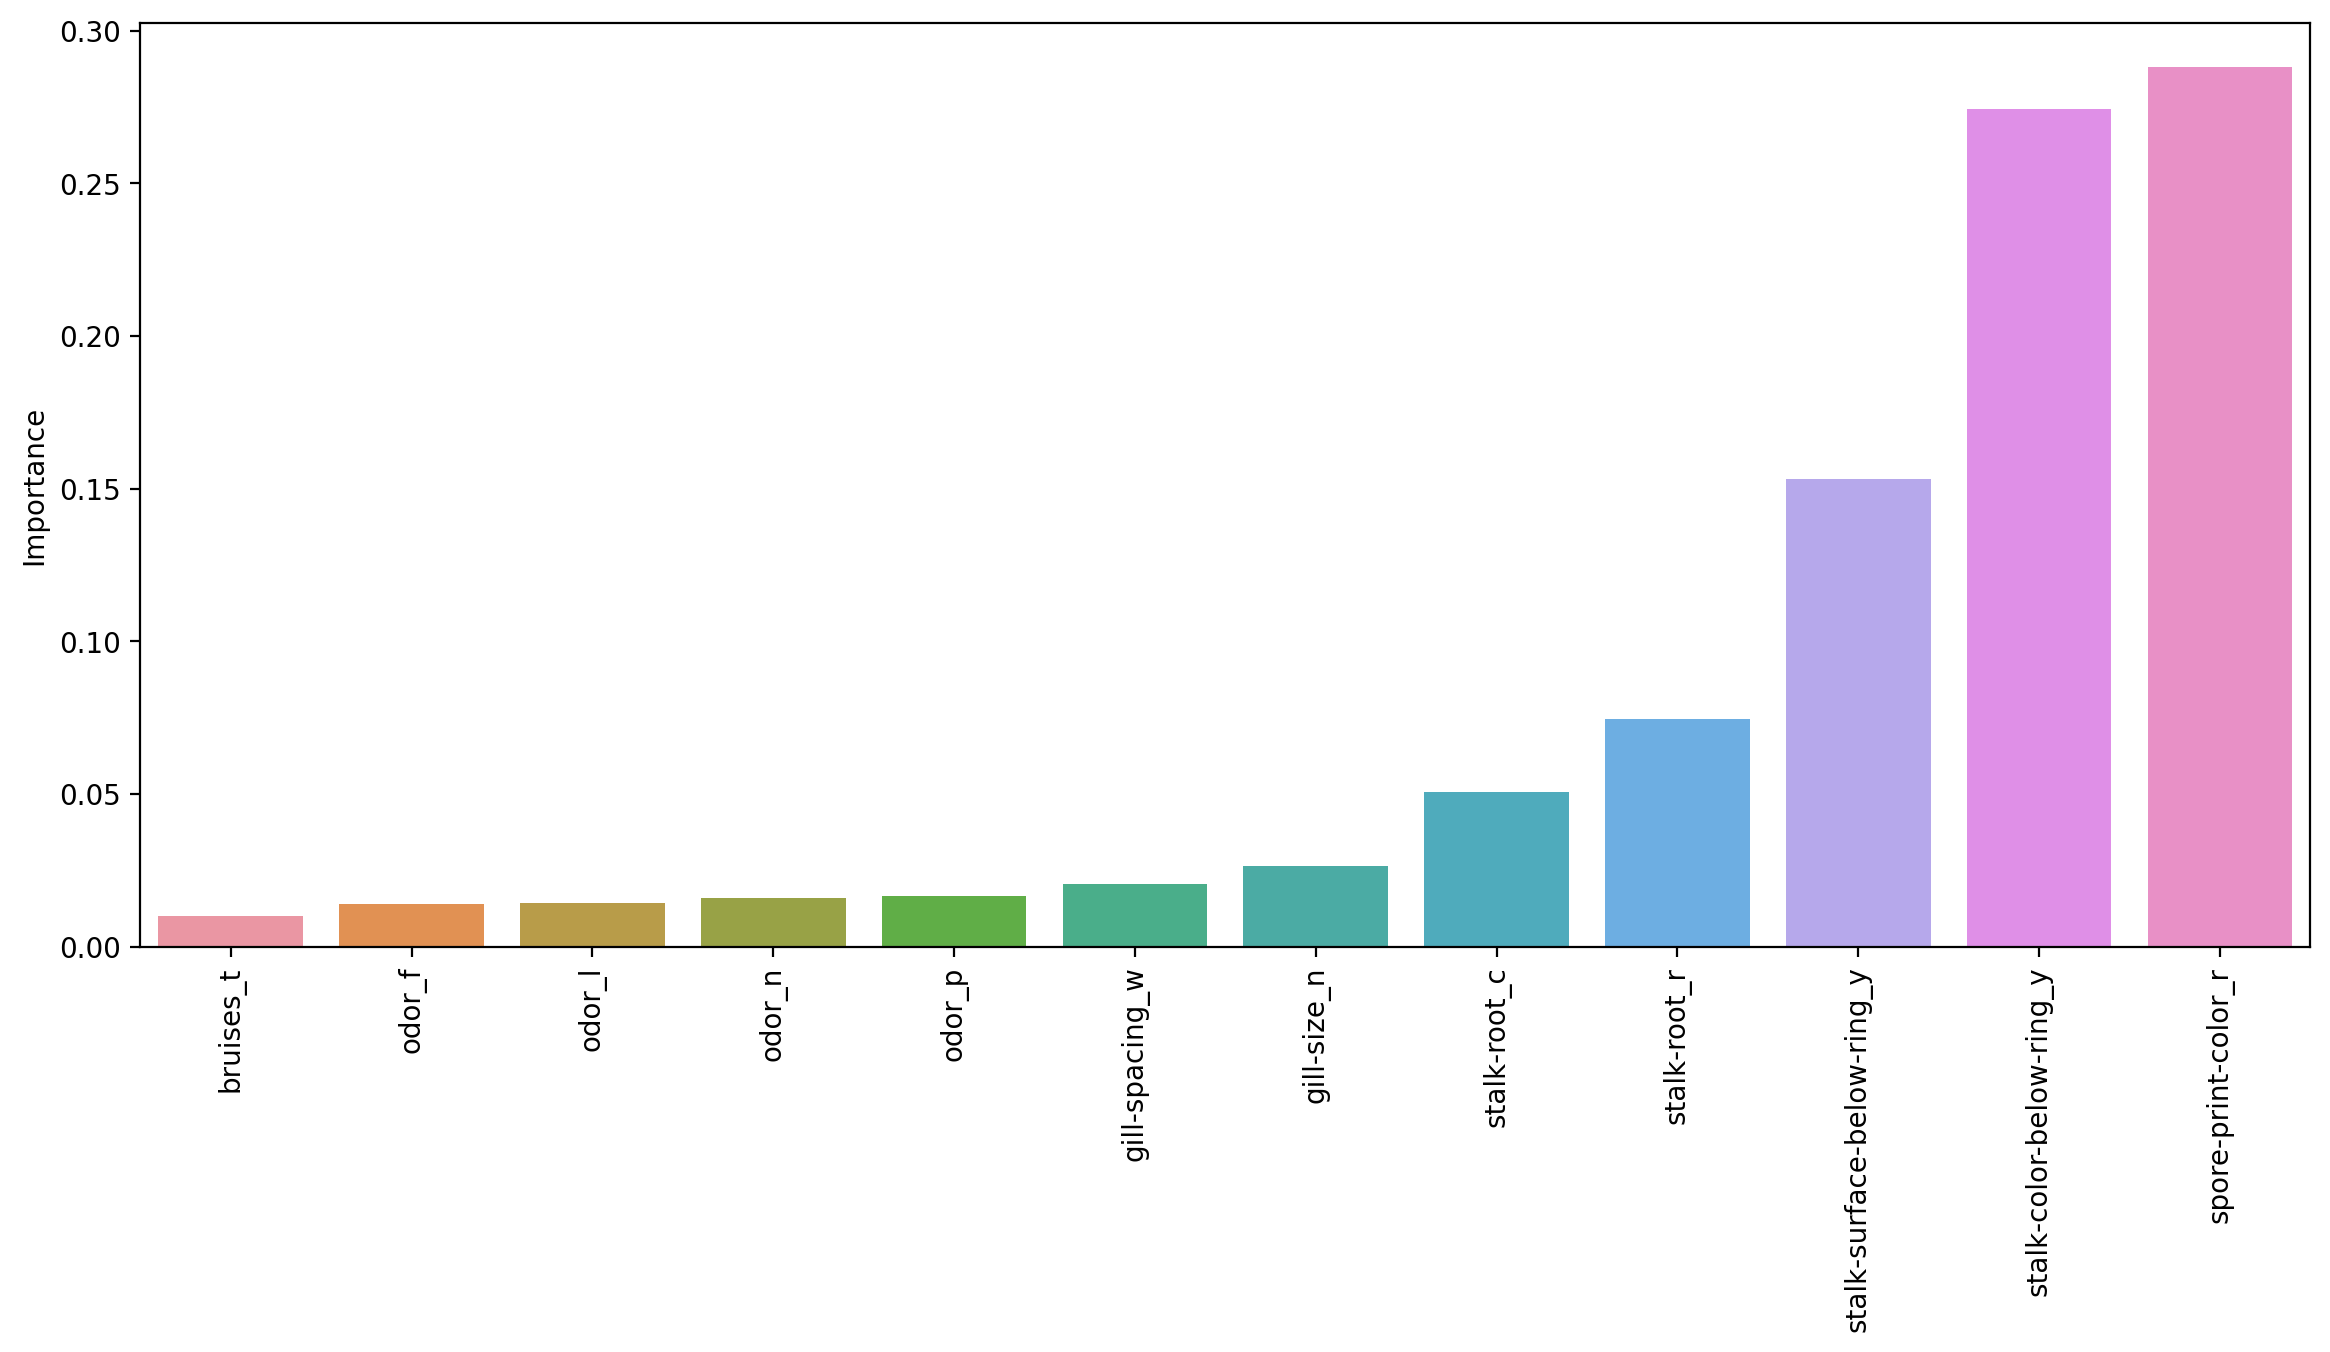

In [32]:
plt.figure(figsize=(14,6),dpi=200)

sns.barplot(data=important_features.sort_values('Importance'),
            x=important_features.index,
            y='Importance')
plt.xticks(rotation=90)
plt.show()